# SSVEP using machine learning (ML)

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from IPython import get_ipython
import seaborn as sns
import glob
import pandas as pd
from scipy import signal

In [2]:
# extracted from : https://stackoverflow.com/questions/39032325/python-high-pass-filter
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y

In [3]:
def fourier(node):
    y = df[node]
    y = butter_highpass_filter(y,5,132,5)   
    ps = np.abs(np.fft.fft(y))**2

    time_step = float(1)/128
    freqs = np.fft.fftfreq( y.size , time_step )
    idx = np.argsort(freqs)
    
    return freqs,ps,idx

In [4]:
file_ = ('../Data/ssvep/dinuka_8' + ".csv")

df = pd.read_csv(file_,index_col=None, header=0,skiprows=range(1, 35))

rows,clmns = df.shape 

df = df.loc[128 :5*128]

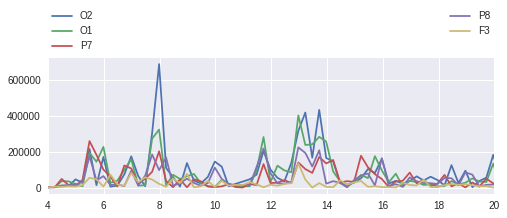

In [6]:
# display of all the nodes with values

f1,p1,i1 = fourier('O1 Value')
f2,p2,i2 = fourier('O2 Value')
f3,p3,i3 = fourier('P7 Value')
f4,p4,i4 = fourier('P8 Value')
f5,p5,i5 = fourier('F3 Value')

plt.figure(1)
plt.subplot(211)
plt.plot(f2[i2] , p2[i2],label="O2")
plt.plot(f1[i1] , p1[i1],label="O1")
plt.plot(f3[i3] , p3[i3],label="P7")
plt.plot(f4[i4] , p4[i4],label="P8")
plt.plot(f5[i5] , p5[i5],label="F3")

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)


plt.xlim([4,20])
plt.show()